In [2]:
import pandas as pd
import numpy as np

In [3]:
selected_columns = ['Indv. CODE', 'HOUSE_n_or', 'House_n_gl', 'G_H00K', 'sum_G_HOOK', 'num_indiv', 
                    'Electricit', 'Radio', 'Domestic animals', 'Toilet', 
                    'Drinking w', 'Drinking_1', 'Bath', 'Water cook', 
                    'Hand washi', 'NDVI', 'ri_bfd', 'ri_orcd_n', 'BSI_n', 
                    'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n', 'CECSOL_n', 
                    'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n', 'Phikcl_n']

In [5]:
column_types = {
    'GENDER': 'category', 
    'AGE': 'float64', 
    're_G_trich': 'category', 
    're_G_Asc': 'category', 
    're_G_Hook': 'category', 
    're_H_Enter': 'category',
    're_H_Schis': 'category', 
    're_H_Hym_n': 'category', 
    're_H_Hym_d': 'category', 
    'sum_G_Stro': 'float64', 
    'sum_G_Tric': 'float64',
    'sum_G_Asc': 'float64', 
    'sum_G_HOOK': 'float64', 
    'sum_H_Ente': 'float64', 
    'sum_H_Schi': 'float64', 
    'sum_H_Hym_': 'float64',
    'sum_H_Hy_1': 'float64', 
    'si_G_Stron': 'category', 
    'si_G_Trich': 'category', 
    'si_G_Asc': 'category', 
    'si_G_Hook': 'category',
    'si_H_Enter': 'category', 
    'si_H_schis': 'category', 
    'si_H_hym_n': 'category', 
    'si_H_hym_d': 'category', 
    'riq_Geoh': 'float64',
    'riq_helm': 'float64', 
    'p_G_Strong': 'float64', 
    'p_G_Trich': 'float64', 
    'p_G_Asc': 'float64', 
    'p_G_HOOK': 'float64',
    'p_H_Enter': 'float64', 
    'p_H_Schis': 'float64', 
    'p_H_hym_n': 'float64', 
    'p_H_hym_d': 'float64', 
    'sh_geohel': 'float64',
    'sh_helm': 'float64', 
    'geohel_dom': 'category', 
    'Re_hous_nu': 'float64', 
    'num_indiv': 'float64', 
    're_G_stron': 'category',
       'ind_tip1_G': 'category', 
    'ind_tip1_H': 'category', 
    'p_tip1_G': 'float64', 
    'p_tip1_H': 'float64', 
    'ind_inf_Ge': 'float64',
    'ind_inf_He': 'float64', 
    'n_Geo_mean': 'float64', 
    'n_Hel_mean': 'float64', 
    'HOOKWORM_h': 'float64', 
    'HGH_x_50': 'float64',
    'r_huev_hoo': 'float64', 
    'Roof': 'category', 
    'Floor': 'category', 
    'Wall': 'category', 
    'Electricit': 'category', 
    'Radio': 'category',
    'Domestic a': 'category', 
    'Toilet': 'category', 
    'Drinking w': 'category', 
    'Drinking_1': 'category', 
    'Bath': 'category',
    'Water cook': 'category', 
    'Hand washi': 'category', 
    'Miembros_': 'float64', 
    'n_geo_stde': 'float64', 
    'n_Hel_stde': 'float64',
    're_hgh50': 'float64', 
    'sum_hgh50': 'float64', 
    'Prev_FO': 'float64', 
    'Prev_piel': 'float64', 
    'riego_ingr': 'float64',
    'riesgo_ele': 'category', 
    'Riesgo_wat': 'category', 
    'rieg_w2': 'category', 
    'riesg_w_2': 'category', 
    'riesg_w_3': 'category',
    'Ri_ingre': 'float64', 
    'NDVI': 'float64', 
    'Prec': 'float64', 
    'ri_bfd': 'float64', 
    'ri_orcd_n': 'float64', 
    'Ri_prec': 'float64',
    'Ri_NumInd': 'float64', 
    'BSI_n': 'float64', 
    'MSI_n': 'float64', 
    'NDBI_n': 'float64', 
    'BLDFIE_n': 'float64', 
    'BDRIC_n': 'float64',
    'CECSOL_n': 'float64', 
    'Clyp_n': 'float64', 
    'Crfvol_n': 'float64', 
    'Ocstha_n': 'float64', 
    'SLTppt_n': 'float64', 
    'Phihox_n': 'float64',
    'Phikcl_n': 'float64', 
    'Temp_n': 'float64'
}

In [9]:
base_path = '../data/geohelmints_base.csv'

In [10]:
raw_df = pd.read_csv(base_path, dtype=column_types, header=0, na_values=[' ', '*', ''])

#### Sacamos las ultimas dos filas porque no van 

In [11]:
filtered_base = raw_df.loc[:len(raw_df)-3,selected_columns]

### Creamos Nuevas Features 

#### Creamos las aldeas 

In [12]:
filtered_base['Indv. CODE']

0       SE01
1       SE02
2       SE03
3       SE04
4       SE05
       ...  
365    ZE116
366    ZE117
367    ZE118
368    ZE121
369    ZE123
Name: Indv. CODE, Length: 370, dtype: object

In [13]:
# La aldea es representada por las primeras lestras del codigo del individuo
filtered_base['aldea']=filtered_base['Indv. CODE'].apply(lambda x: x[:2])

#### Creamos la media de las distancias de cada aldea 

In [14]:
mean_distances = {
    'SE': 911,
    'ZE': 372,
    'MA': 369
}

In [15]:
def get_distances(row):
    aldea = row['aldea']
    return mean_distances[aldea]

In [16]:
filtered_base['mean_distance'] = filtered_base.apply(lambda x: get_distances(x), axis=1)

### Media de prevalencia por casa 

In [17]:
target_feature = 'sum_G_HOOK'

## Agrupamos por casa 

In [18]:
base_byhouse=filtered_base.groupby('HOUSE_n_or').first()

#### Vemos el target por casa 

In /home/juansca/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/juansca/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/juansca/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/juansca/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/juansca/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


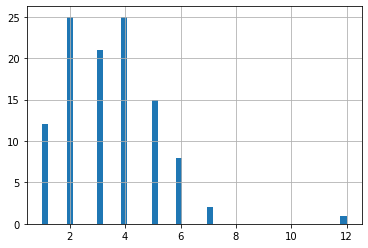

In [19]:
base_byhouse['num_indiv'].hist(bins=50)

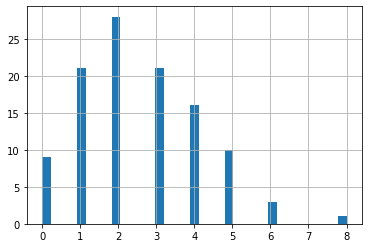

In [20]:
base_byhouse[target_feature].hist(bins=35)

### Dividimos entre target y features 

In [21]:

features =base_byhouse.drop(columns=[target_feature])

In [22]:
target = base_byhouse[target_feature]

### Fix nan values 

In [23]:
features['Drinking w'] = features['Drinking w'].fillna('Well')
features.Drinking_1 = features.Drinking_1.fillna('River')
features.Bath = features.Bath.fillna('River')
features['Water cook'] = features['Water cook'].fillna('River')
features['Hand washi'] = features['Hand washi'].fillna('River')
features.Radio = features.Radio.fillna('0')

## Encode Categorical data 

Las que se puede, vamos a encodearla con el orden natural de las caracteristicas que simbolizan

Las presencia/ausencia tambien modelan caracteristicas sociales que indican usar valores 0,1

In [24]:
toilet_encode = {'Open area/Bush': 0, 'Latrine without slate': 1}
water_encode = {'Well': 0, 'River': 1, 'Pipe line': 2, 'Treated boreholes': 3}

In [25]:
def encode_categorical_features(row):
    elec = int(row['Electricit'])
    row['Electricit'] = elec
    radio = int(row['Radio'])
    row['Radio'] = radio
    
    toilet = toilet_encode[row['Toilet']]
    row['Toilet'] = toilet
    
    drink_w = water_encode[row['Drinking w']]
    row['Drinking w'] = drink_w
    
    drink_1 = water_encode[row['Drinking_1']]
    row['Drinking_1'] = drink_1
    
    bath = water_encode[row['Bath']]
    row['Bath'] = bath
    
    water_c = water_encode[row['Water cook']]
    row['Water cook'] = water_c
    
    hand_wash = water_encode[row['Hand washi']]
    row['Hand washi'] = hand_wash
    
    
    return row


In [26]:
encoded_features = features.apply(lambda x: encode_categorical_features(x), axis=1)

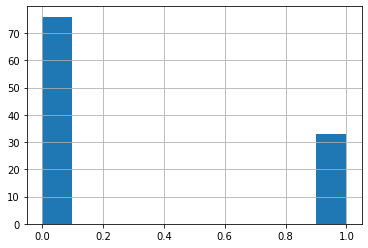

In [27]:
encoded_features.Electricit.hist()

In [28]:
non_columns = ['aldea','Indv. CODE','House_n_gl','G_H00K','num_indiv']

base_saldea=encoded_features.drop(columns=non_columns)

In [29]:
base_saldea

,Electricit,Radio,Domestic animals,Toilet,Drinking w,Drinking_1,Bath,Water cook,Hand washi,NDVI,...,BLDFIE_n,BDRIC_n,CECSOL_n,Clyp_n,Crfvol_n,Ocstha_n,SLTppt_n,Phihox_n,Phikcl_n,mean_distance
HOUSE_n_or,,,,,,,,,,,,,,,,,,,,,
MA-01,0,0,1.0,0,0,0,1,0,0,0.604,...,0.256,1.0,0.336,0.333,0.435,0.200,0.4,0.000,0.679,369
MA-02,0,0,1.0,0,0,0,0,0,0,0.598,...,0.178,1.0,0.336,0.333,0.478,0.100,0.4,0.250,0.428,369
MA-03,0,0,1.0,0,0,0,0,0,0,0.604,...,0.229,1.0,0.336,0.333,0.450,0.165,0.4,0.087,0.591,369
MA-04,0,0,0.0,0,0,0,0,0,0,0.598,...,0.193,1.0,0.336,0.333,0.470,0.119,0.4,0.202,0.476,369
MA-05,0,0,0.0,0,0,0,0,0,0,0.592,...,0.197,1.0,0.336,0.333,0.468,0.124,0.4,0.189,0.489,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZE-40,1,0,0.0,0,1,0,0,0,0,0.492,...,0.223,1.0,0.783,0.444,0.217,0.300,0.6,0.500,0.428,372
ZE-41,1,0,0.0,1,0,0,0,0,0,0.492,...,0.223,1.0,0.783,0.444,0.217,0.300,0.6,0.500,0.428,372
ZE-43,1,1,0.0,0,0,0,0,0,0,0.520,...,0.290,1.0,0.559,0.444,0.174,0.300,0.4,0.750,0.929,372


In [30]:
base_saldea.columns

Index(['Electricit', 'Radio', 'Domestic animals', 'Toilet', 'Drinking w',
       'Drinking_1', 'Bath', 'Water cook', 'Hand washi', 'NDVI', 'ri_bfd',
       'ri_orcd_n', 'BSI_n', 'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n',
       'CECSOL_n', 'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n',
       'Phikcl_n', 'mean_distance'],
      dtype='object')

In [31]:
target

HOUSE_n_or
MA-01    4.0
MA-02    4.0
MA-03    8.0
MA-04    3.0
MA-05    3.0
        ... 
ZE-40    1.0
ZE-41    2.0
ZE-43    3.0
ZE-44    2.0
ZE-46    1.0
Name: sum_G_HOOK, Length: 109, dtype: float64

### Una vez que limpiamos los datos, entrenamos el modelo¶


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor()

In [30]:
model.fit(base_saldea, target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

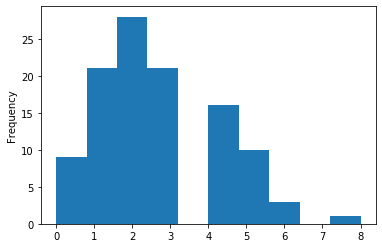

In [31]:
target.plot.hist()

In [32]:
target

HOUSE_n_or
MA-01    4.0
MA-02    4.0
MA-03    8.0
MA-04    3.0
MA-05    3.0
        ... 
ZE-40    1.0
ZE-41    2.0
ZE-43    3.0
ZE-44    2.0
ZE-46    1.0
Name: sum_G_HOOK, Length: 109, dtype: float64

In [36]:
scores, mean, std_dev = stats(base_saldea, target, RandomForestRegressor())

In [37]:
print_stats(scores, mean, std_dev)


Stats
-----

Model Scores:  [1.72029728 1.6020553  1.67138484 1.79339885 1.98088845]
Mean Score:  1.7536049415652848
Standard Deviation of Score:  0.12967512341826531


In [ ]:
###Analizamos features para cantidad de casos de hookworm por casa 

In [35]:
import shap
import xgboost
shap.initjs()

In [40]:
print(list(base_saldea.columns))

['Electricit', 'Radio', 'Domestic animals', 'Toilet', 'Drinking w', 'Drinking_1', 'Bath', 'Water cook', 'Hand washi', 'NDVI', 'ri_bfd', 'ri_orcd_n', 'BSI_n', 'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n', 'CECSOL_n', 'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n', 'Phikcl_n', 'mean_distance']


In [105]:
from xgboost.sklearn import XGBModel
# Obtenidos del notebook validating_model.ipynb
xgb_params = {'max_depth': 3, 'n_estimators':5,
          'tree_method': 'exact', 'booster': 'gbtree', 
         'objective': 'reg:squarederror', 'colsample_bynode': 0.2, 'base_score':target.mean()}

model = xgboost.train(xgb_params, xgboost.DMatrix(base_saldea, label=target), 100)

[09:49:41] WARNING: /workspace/src/learner.cc:328: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [89]:
model_xgb = XGBModel(**xgb_params)
model_xgb.fit(base_saldea, target)
model_booster = model_xgb.get_booster()

[09:37:01] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBModel(base_score=2.5688073394495414, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=0.2, colsample_bytree=1, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints=None,
         learning_rate=0.300000012, max_delta_step=0, max_depth=3,
         min_child_weight=1, missing=nan, monotone_constraints=None,
         n_estimators=5, n_jobs=0, num_parallel_tree=1,
         objective='reg:squarederror', random_state=0, reg_alpha=0,
         reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1, verbosity=None)

In [100]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(base_saldea, label=target), 100)

In [108]:
explainer = shap.TreeExplainer(model_booster)
shap_values = explainer.shap_values(base_saldea)

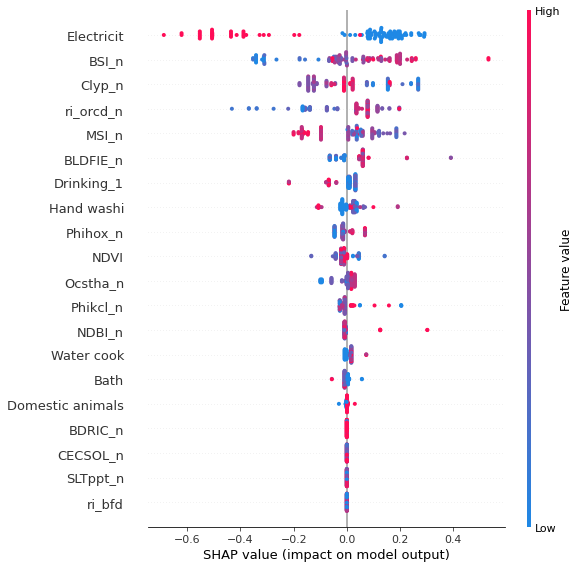

In [109]:
shap.summary_plot(shap_values, base_saldea, plot_type='dot', feature_names=base_saldea.columns)

### 
- electricidad 
- ndvi
- hand wash
- bsi


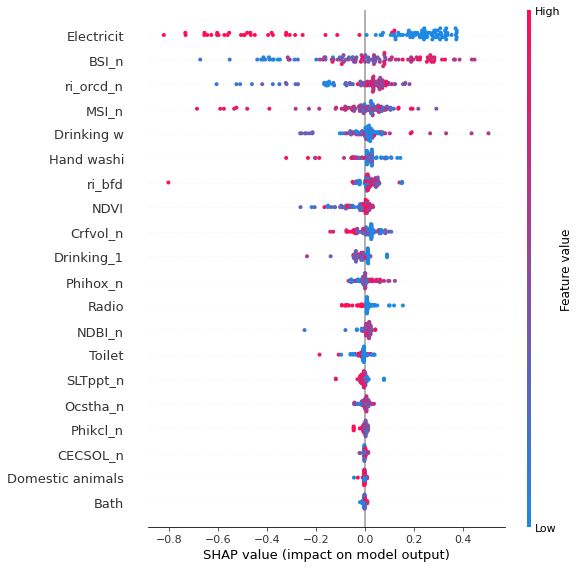

In [56]:
shap.summary_plot(shap_values, base_saldea, plot_type='dot', feature_names=base_saldea.columns)

## Graficos Force plot

Usamos los puntos que se corresponden con los siguientes estadisticos
- max
- min
- median

In [68]:
max_ = max(target)
min_ = min(target)
median_ = target.median()

In [69]:
max_indexes = target.index[target == max_].tolist()
min_indexes = target.index[target == min_].tolist()
median_indexes = target.index[target == median_].tolist()


In [60]:
target.index

Index(['MA-01', 'MA-02', 'MA-03', 'MA-04', 'MA-05', 'MA-06', 'MA-07', 'MA-08',
       'MA-09', 'MA-10',
       ...
       'ZE-35', 'ZE-36', 'ZE-37', 'ZE-38', 'ZE-39', 'ZE-40', 'ZE-41', 'ZE-43',
       'ZE-44', 'ZE-46'],
      dtype='object', name='HOUSE_n_or', length=109)

In [70]:
casa_max = max_indexes[0]
print(f'El maximo valor es {max_} y se corresponde con la casa {casa_max}')
i_max = list(base_saldea.index).index(casa_max)
shap.force_plot(explainer.expected_value, shap_values[i_max,:], base_saldea.iloc[i_max,:])

El maximo valor es 8.0 y se corresponde con la casa MA-03


In [71]:
casa_min = min_indexes[0]
print(f'El minimo valor es {min_} y se corresponde con la casa {casa_min}')
i_min = list(base_saldea.index).index(casa_min)
shap.force_plot(explainer.expected_value, shap_values[i_min,:], base_saldea.iloc[i_min,:])

El minimo valor es 0.0 y se corresponde con la casa MA-37


# Las medianas 

In [72]:
casa_median = median_indexes[0]
print(f'El valor de la mediana es {median_} y se corresponde con la casa {casa_median}')

i_median = list(base_saldea.index).index(casa_median)

shap.force_plot(explainer.expected_value, shap_values[i_median,:], base_saldea.iloc[i_median,:])

El valor de la mediana es 2.0 y se corresponde con la casa MA-06


In [73]:
casa_median = median_indexes[17]
print(f'El valor de la mediana es {median_} y se corresponde con la casa {casa_median}')

i_median = list(base_saldea.index).index(casa_median)

shap.force_plot(explainer.expected_value, shap_values[i_median,:], base_saldea.iloc[i_median,:])

El valor de la mediana es 2.0 y se corresponde con la casa SE-53


In [74]:
casa_median = median_indexes[-1]
print(f'El valor de la mediana es {median_} y se corresponde con la casa {casa_median}')

i_median = list(base_saldea.index).index(casa_median)

shap.force_plot(explainer.expected_value, shap_values[i_median,:], base_saldea.iloc[i_median,:])

El valor de la mediana es 2.0 y se corresponde con la casa ZE-44


In [75]:
i_median

107

# Graficos de dependencia

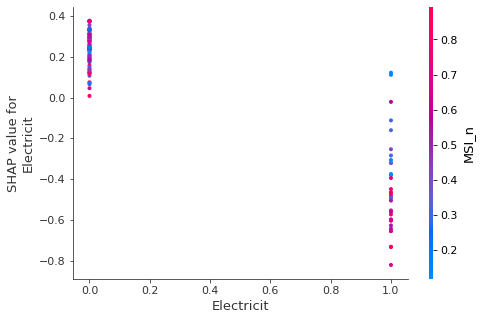

In [159]:
#shap.dependence_plot('Electricit', shap_values, base_saldea, interaction_index='NDVI')
#shap.dependence_plot('Electricit', shap_values, base_saldea, interaction_index='MSI_n')
#shap.dependence_plot('NDBI_n', shap_values, base_saldea, interaction_index='NDVI')

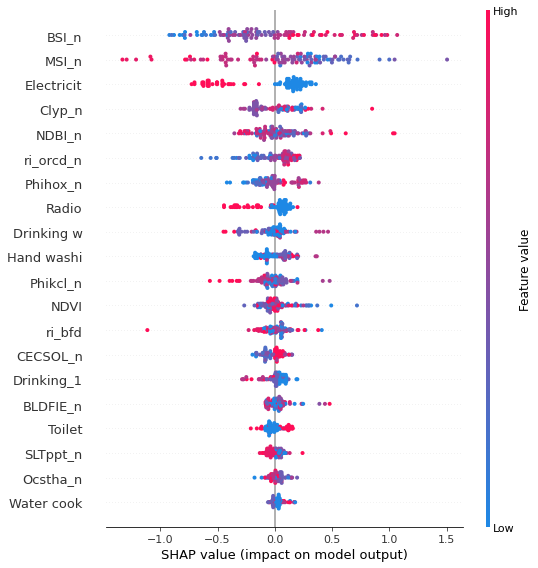

In [76]:
shap.summary_plot(shap_values, base_saldea, plot_type='dot', feature_names=base_saldea.columns)

In [81]:
shap.decision_plot(expected_value, shap_values[misclassified], features_display[misclassified],
                   link='logit', highlight=0)

AttributeError: module 'shap' has no attribute 'decision_plot'

In [77]:
my_columns = ['Drinking_1', 'Hand washi', 'Drinking w', 'NDVI', 'Electricit', 'MSI_n', 'BSI_n']

In [78]:
import numpy as np

base_columns = list(base_saldea.columns)
indexes = [base_columns.index(c) for c in my_columns]
array_columns = np.array(base_columns)[indexes]
names = list(array_columns)

In [79]:
shap.decision_plot(explainer.expected_value, shap_values[i_median, indexes], names, highlight=0)

AttributeError: module 'shap' has no attribute 'decision_plot'

In [80]:
shap.decision_plot(explainer.expected_value, shap_values[i_min, indexes], names, highlight=0)

AttributeError: module 'shap' has no attribute 'decision_plot'

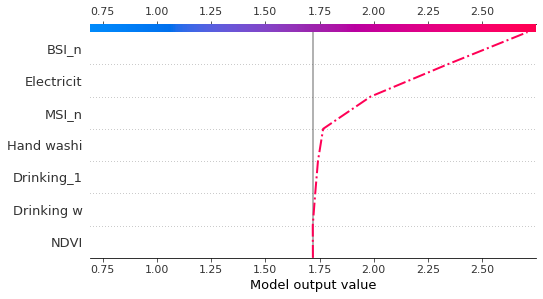

In [262]:
# Cambiar i_max por el "punto" que quieras
# Podes cambiar ese "punto" por un rango de puntos
# Esto seria cambiar i_max por 5:10 y entonces te va a mostrar los puntos del 5 al 10
# So qieres ver todos los puntos, cambias el i_max por :
shap.decision_plot(explainer.expected_value, shap_values[i_max, indexes], names, highlight=0)

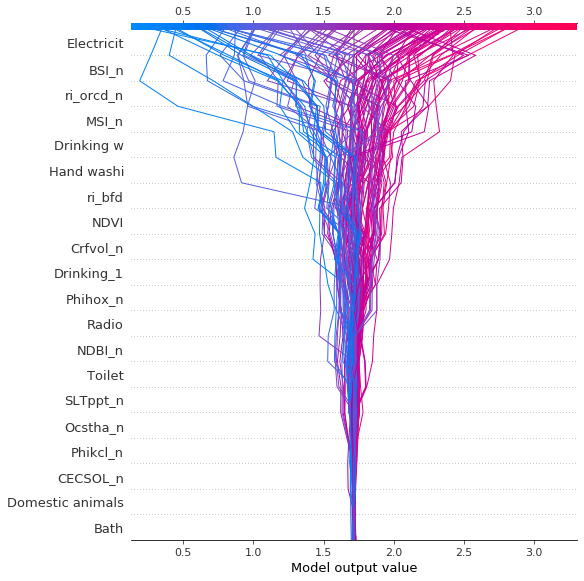

In [263]:
shap.decision_plot(explainer.expected_value, shap_values, base_saldea.columns, highlight=0)

### metricas:
- aic
- r2
- coef corr
- mce

- lineal
- xg

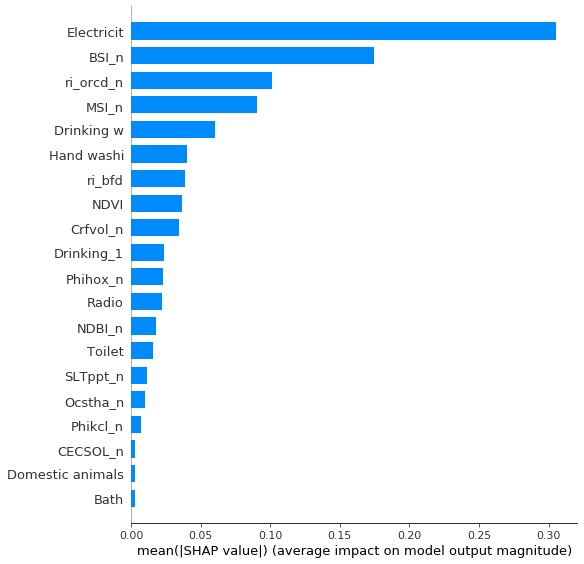

In [44]:
shap.summary_plot(shap_values, base_saldea, plot_type='bar', feature_names=base_saldea.columns)